In [5]:
import pandas as pd
import scipy.stats as st
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier as dtc
from sklearn.metrics import accuracy_score
from joblib import dump, load
from sklearn import tree
import math
import random
%matplotlib inline

In [6]:
# load data
df = pd.read_csv('framingham.csv')
df

# predict chronic heart disease from cigs per day
X = df['cigsPerDay']
y = df['TenYearCHD'] # 10-year coronary heart disease

In [60]:
# filter bad entries

X_adjusted = []
y_adjusted = []

# X.size == y.size
# Looping through both arrays at once to save time

for i in range(0, X.size):
    X_data = X[i]
    y_data = y[i]
    if not pd.isna(X_data) and (y_data == 0 or y_data == 1):
        X_adjusted.append(X_data)
        y_adjusted.append(y_data)
        
print(X.size)
print(len(X_adjusted))
        

4238
4209


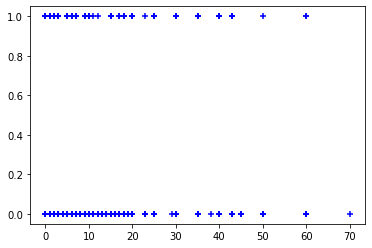

<Figure size 2500x1500 with 0 Axes>

In [58]:
plt.scatter(X_adjusted, y_adjusted, marker='+', color='blue')
plt.figure(figsize=(5, 3), dpi=500)
plt.show()

In [54]:
X_train, X_test, y_train, y_test = train_test_split(np.array(X_adjusted).reshape(-1,1), y_adjusted, test_size=0.25)
print(f"X train: {X_train}\n")
print(f"X test: {X_test}\n")
print(f"y train: {y_train}\n")
print(f"y test: {y_test}\n")

model = LogisticRegression()
model.fit(X_train, y_train) # TODO: fix, why are all predictions 0

X train: [[20.]
 [12.]
 [ 0.]
 ...
 [ 0.]
 [30.]
 [20.]]

X test: [[30.]
 [ 0.]
 [20.]
 ...
 [ 0.]
 [20.]
 [ 0.]]

y train: [0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,

LogisticRegression()

In [56]:
for e in model.predict(X_test):
    if e == 1:
        print(False) # didn't print anything

In [11]:
def sigmoid_function(x, m, b):
    return 1/(1 + math.exp(-1 * (m * x + b)))
              
# optimize model using stochastic gradient descent

clusters = [] # stores x values of data
m_init = 1
b_init = 0
points = []
    
def stochastic_gradient_descent(x, m, b):
    cluster_points()
    random_cluster_points()
    m_new = m_init
    b_new = b_init
    for point in points:
        y = sigmoid_function(point, m_new, b_new)
        adjusted_m = derivative_m(point, y, m_new, b_new)
        adjusted_b = derivative_b(point, y, m_new, b_new)
        m_new = m_new - adjusted_m
        b_new = b_new - adjusted_b
         

def cluster_points():
    # increment by some x and use a circle with radius x/2 to capture points
    increment = 1
    start = min(X_adjusted)
    end = max(X_adjusted)
    if (end - start) < 10:
        increment = 5
    else:
        increment = 10
    
    for i in range(start, end, increment):
        temp = []
        for j in range(start, end):
            if X_adjusted[j] is not None:
                temp.append(X_adjusted[j])
        clusters.append(temp)
        
    
def random_cluster_points():
    for cluster in clusters:
        i = random.randint(0, len(cluster))
        points.append(cluster[i])

# partial derivative of loss function with respect to slope
def derivative_m(x, y, m, b):
    return (-2*x)*(y-(b+m*x))
    
    
# partial derivative of loss function with respect to y-intercept
def derivative_b(x, y, m, b):
    return -2*(y-(b+m*x))

In [48]:
model = dtc()
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
dump(model, 'breast-cancer.joblib')
model = load('breast-cancer.joblib')